In [1]:
import csv
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [14]:
#load data
filename = "\diabetes.csv"
dirac = r"D:\prednasky\archive"
rows = []
fields = []
x = []
y = []
with open(dirac + filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)
for i in range(len(rows)):
    x.append(rows[i][:-1])
    y.append(rows[i][-1])

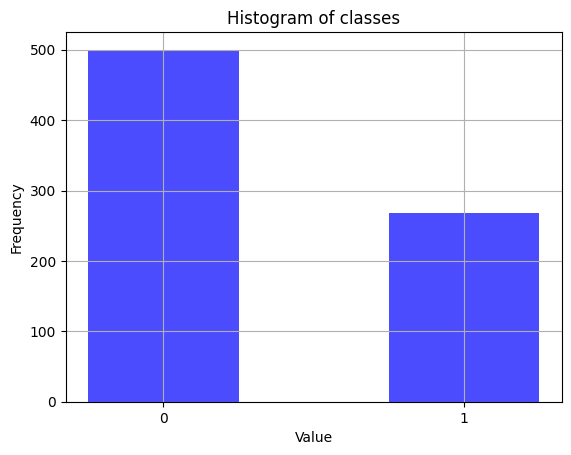

In [3]:
#Histogram of classes
y_sorted = y
y_sorted.sort()
plt.hist(y_sorted, bins=[-0.5, 0.5, 1.5], rwidth=0.5, color='blue', alpha=0.7)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of classes')
plt.grid(True)

plt.show()

Cross-validation entropy scores [0.68831169 0.7012987  0.72727273 0.7012987  0.76623377 0.67532468
 0.67532468 0.74025974 0.75       0.64473684]
Mean entropy cross-validarion 0.7070061517429939
Cross-validation gini scores [0.7012987  0.7012987  0.7012987  0.7012987  0.75324675 0.7012987
 0.76623377 0.77922078 0.71052632 0.72368421]
Cross-validation gini mean score 0.7239405331510594
Cross-validation log scores [0.68831169 0.7012987  0.72727273 0.7012987  0.76623377 0.67532468
 0.67532468 0.74025974 0.75       0.64473684]
Cross-validation log mean score 0.7070061517429939


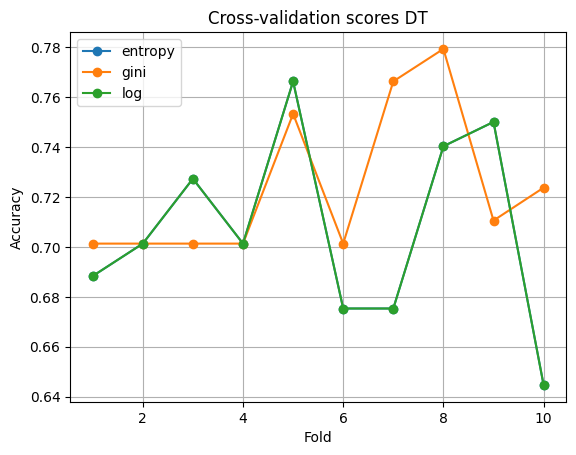

In [15]:
# we are trying to find the best criterion
model = DecisionTreeClassifier(criterion="entropy", random_state=24)
kf = KFold(n_splits=10, shuffle=True, random_state=24)
scores_en = cross_val_score(model, x, y, cv=kf)
print("Cross-validation entropy scores", scores_en)
print("Mean entropy cross-validarion", scores_en.mean())
space = np.linspace(1, len(scores_en), num=len(scores_en))
model_g = DecisionTreeClassifier(criterion="gini", random_state=24)
scores_gini = cross_val_score(model_g, x, y, cv=kf)
print("Cross-validation gini scores", scores_gini)
print("Cross-validation gini mean score", scores_gini.mean())
model_l = DecisionTreeClassifier(criterion="log_loss", random_state=24)
scores_log = cross_val_score(model_l, x, y, cv=kf)
print("Cross-validation log scores", scores_log)
print("Cross-validation log mean score", scores_log.mean())
plt.plot(space, scores_en, label = "entropy", marker="o", linestyle="-")
plt.plot(space, scores_gini, label = "gini", marker="o", linestyle="-")
plt.plot(space, scores_log, label = "log", marker="o", linestyle="-")
plt.grid()
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation scores DT')
plt.legend(['entropy', 'gini', 'log'])
plt.show()

Maximum is 0.7532467532467533
Best number of the nodes 24


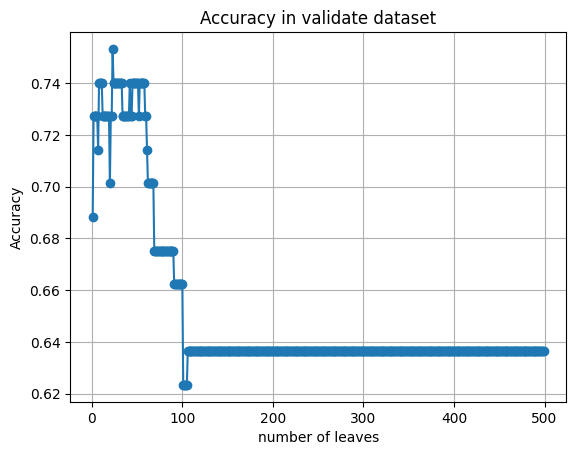

In [17]:
#number of leaves 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
accure = []
counter = 2
maximum = 0
number_to_stop_find = 0
stop_number = 100
best_node = 0
while True:
    model = DecisionTreeClassifier(criterion="gini", random_state=24, max_leaf_nodes=counter)
    model.fit(x_train, y_train)
    out = model.predict(x_test)
    res = accuracy_score(y_test, out)
    accure.append(res)
    counter += 1
    if res > maximum:
        maximum = res
        best_node = model.tree_.n_leaves
        number_to_stop_find = 0
    else:
        number_to_stop_find += 1
    #if number_to_stop_find == stop_number:
    #    break
    if counter > 500:
        break
print("Maximum is", maximum)
print("Best number of the nodes", best_node)
space = np.linspace(1, len(accure), num=len(accure))
plt.plot(space, accure, marker='o')
plt.grid(True)
plt.xlabel("number of leaves")
plt.ylabel("Accuracy")
plt.title("Accuracy in validate dataset")
plt.show()

In [18]:
# Visualizing of decision tree
model = DecisionTreeClassifier(criterion="gini", random_state=24, max_leaf_nodes=best_node)
model.fit(x_train, y_train)
out = model.predict(x_test)

print("Final accuracy of DT:", accuracy_score(y_test, out))
rep = classification_report(y_test, out, target_names=['Healthy', 'Diabetes'])
print('Classification DT reort', rep)

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"],  
                           class_names=["False", "True"],
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render(r"diabet_decision_tree")
graph.view()

Final accuracy of DT: 0.7532467532467533
Classification DT reort               precision    recall  f1-score   support

     Healthy       0.82      0.80      0.81        50
    Diabetes       0.64      0.67      0.65        27

    accuracy                           0.75        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.76      0.75      0.75        77



'diabet_decision_tree.pdf'

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean cross-validation entropy score 0.7643028024606972
Mean cross-validation gini score 0.7695488721804512
Mean cross-validation log score 0.7643028024606972


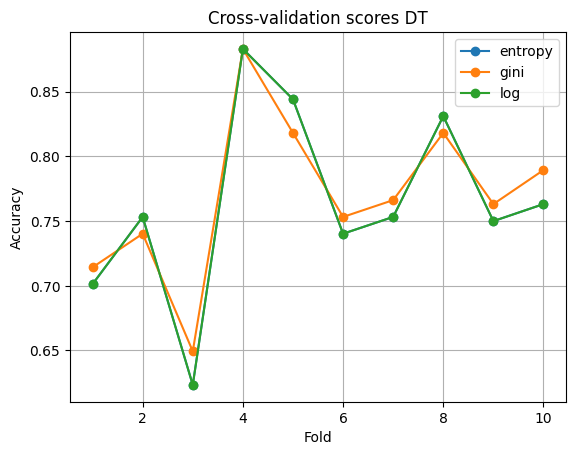

In [19]:
#Random forest find the best parameters and calculate accuracy

rf = RandomForestClassifier(random_state=24)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1, error_score='raise')
grid_search.fit(x_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')

# found out that the best parameter are:
# max_depth=20
# max_features=sqrt
# min_samples_leaf=1
# min_samples_split=10
# n_estimators=100

rf_e = RandomForestClassifier(criterion="entropy", random_state=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, max_depth=20, max_features='sqrt')
rf_g = RandomForestClassifier(criterion="gini", random_state=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, max_depth=20, max_features='sqrt')
rf_l = RandomForestClassifier(criterion="log_loss", random_state=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, max_depth=20, max_features='sqrt')
kf = KFold(n_splits=10, shuffle=True, random_state=24)
score_e = cross_val_score(rf_e, x, y, cv=kf)
score_g = cross_val_score(rf_g, x, y, cv=kf)
score_l = cross_val_score(rf_l, x, y, cv=kf)

print("Mean cross-validation entropy score", score_e.mean())
print("Mean cross-validation gini score", score_g.mean())
print("Mean cross-validation log score", score_l.mean())

space = np.linspace(1, len(score_e), num=len(score_e))
plt.plot(space, score_e, label = "entropy", marker="o", linestyle="-")
plt.plot(space, score_g, label = "gini", marker="o", linestyle="-")
plt.plot(space, score_l, label = "log", marker="o", linestyle="-")
plt.grid()
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation scores DT')
plt.legend(['entropy', 'gini', 'log'])
plt.show()


Final RF accuracy 0.7792207792207793
Classification RF reort:
              precision    recall  f1-score   support

     Healthy       0.84      0.82      0.83        50
    Diabetes       0.68      0.70      0.69        27

    accuracy                           0.78        77
   macro avg       0.76      0.76      0.76        77
weighted avg       0.78      0.78      0.78        77



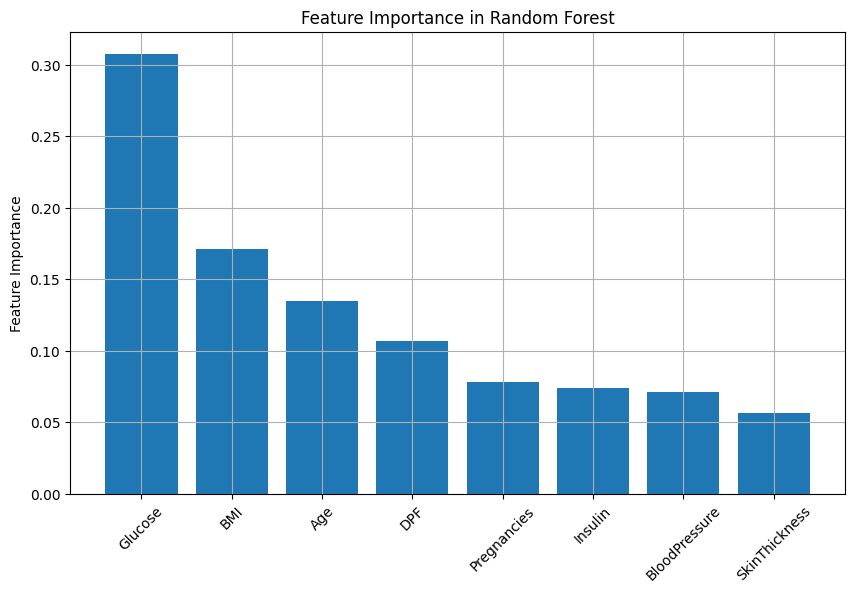

In [20]:
#Final accuracy of random forest and report

clf = RandomForestClassifier(criterion="gini", random_state=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, max_depth=20, max_features='sqrt')
clf.fit(x_train, y_train)
out = clf.predict(x_test)
print("Final RF accuracy", accuracy_score(y_test, out))

rep = classification_report(y_test, out, target_names=['Healthy', 'Diabetes'])
print('Classification RF reort:')
print(rep)

#feature importance in RF
feature_importances = clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Vizualizing of feature importance
X = np.array(x)
labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(labels)), np.array(labels)[sorted_indices], rotation=45)
plt.ylabel('Feature Importance')
plt.grid(True)
plt.title('Feature Importance in Random Forest')
plt.show()

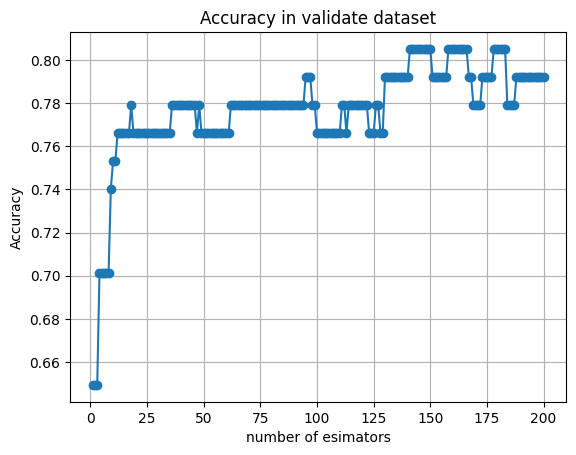

The best accuracy is 0.8051948051948052
The best number of estimators 140


In [21]:
acc = []
number_of_iter = 200
for k in range(1, number_of_iter+1):
    gb = GradientBoostingClassifier(n_estimators=k, learning_rate=0.1, random_state=24)
    gb.fit(x_train, y_train)
    out = gb.predict(x_test)
    acc.append(accuracy_score(y_test, out))
space = np.linspace(1, number_of_iter, num=number_of_iter)
plt.plot(space, acc, marker='o')
plt.grid(True)
plt.xlabel("number of esimators")
plt.ylabel("Accuracy")
plt.title("Accuracy in validate dataset")
plt.show()
print("The best accuracy is", max(acc))
print("The best number of estimators", acc.index(max(acc)))
    

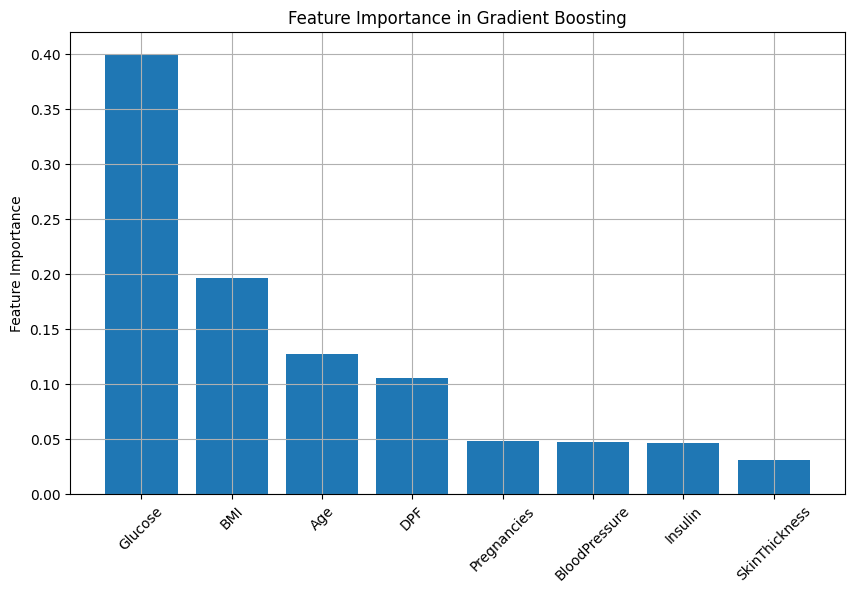

Final GB accuracy 0.7922077922077922
Classification GB reort:
              precision    recall  f1-score   support

     Healthy       0.87      0.80      0.83        50
    Diabetes       0.68      0.78      0.72        27

    accuracy                           0.79        77
   macro avg       0.77      0.79      0.78        77
weighted avg       0.80      0.79      0.80        77



In [22]:
gb = GradientBoostingClassifier(n_estimators=acc.index(max(acc)), learning_rate=0.1, random_state=24)
gb.fit(x_train, y_train)

#feature importance in RF
feature_importances = gb.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Vizualizing of feature importance
X = np.array(x)
labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(labels)), np.array(labels)[sorted_indices], rotation=45)
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting')
plt.grid(True)
plt.show()


#report
out = gb.predict(x_test)
print("Final GB accuracy", accuracy_score(y_test, out))
rep = classification_report(y_test, out, target_names=['Healthy', 'Diabetes'])
print('Classification GB reort:')
print(rep)